In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc

In [4]:
df = pd.read_csv('./articles.csv')

In [5]:
transdf = pd.read_csv('./sampled.csv')

In [6]:
joined = transdf.merge(df, on='article_id')

In [27]:
joined.shape

(2000000, 29)

In [7]:
del df

In [9]:
del transdf

In [10]:
joined.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'product_code', 'prod_name', 'product_type_no', 'product_type_name',
       'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [11]:
countsdf = pd.DataFrame(joined.groupby('article_id')['customer_id'].count())

In [40]:
countsdf['customer_id'].sort_values(ascending=False)

article_id
706016001    3236
706016002    2156
372860001    1940
610776002    1855
464297007    1632
             ... 
641843006       1
818302001       1
641840001       1
641826001       1
956217002       1
Name: customer_id, Length: 81400, dtype: int64

In [12]:
customersdf = pd.DataFrame(joined.groupby('customer_id')['article_id'].count())

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    107
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc     95
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296     92
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71     90
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f     84
                                                                   ... 
77315e07e0e0dda10c5698899080bf827b26c7bb56b495619efd9b8be68b030a      1
77315df15d96a5460f6d40364a89f5c493a9fa773bb5ca5cffae57be1000d38b      1
77315dc8082c33955f8ebcf9f26afb51e9adf7de43aa83984cfa2e4a3737ef46      1
7731212d1d8339baf1671dd399ad3d59744ddd9a52c161fd3f56347f841ac45b      1
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a      1
Name: article_id, Length: 684151, dtype: int64

In [19]:
gc.collect()

10371

<BarContainer object of 78 artists>

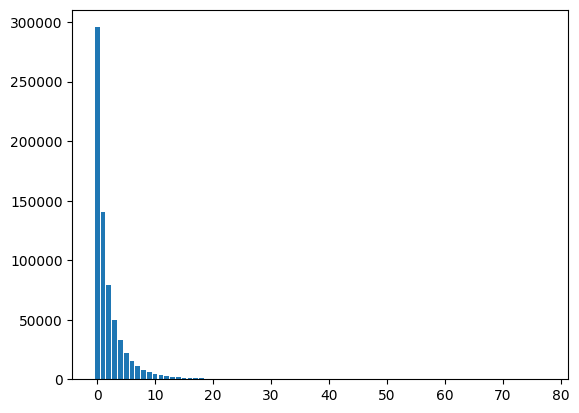

In [29]:
p = customersdf['article_id'].value_counts().sort_index(ascending=True)
plt.bar(range(len(p)),p)